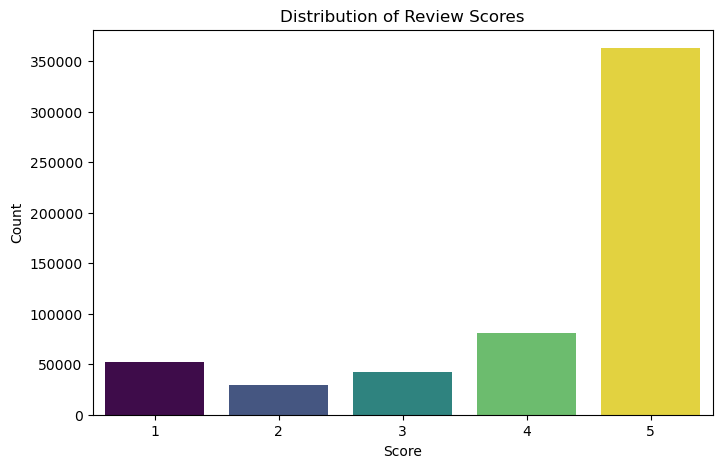

✅ Actionable Insights: This bar chart shows the distribution of review scores (1-5). A high frequency of 4-5 scores suggests generally positive feedback.


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the dataset
file_path = "Reviews.csv"
df = pd.read_csv(file_path)

# Convert time column to readable date
df["Time"] = pd.to_datetime(df["Time"], unit="s")
df["Year"] = df["Time"].dt.year

# 1. Distribution of Review Scores
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Score"], hue=df["Score"], palette="viridis", legend=False)
plt.title("Distribution of Review Scores")
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()
print("✅ Actionable Insights: This bar chart shows the distribution of review scores (1-5). A high frequency of 4-5 scores suggests generally positive feedback.")

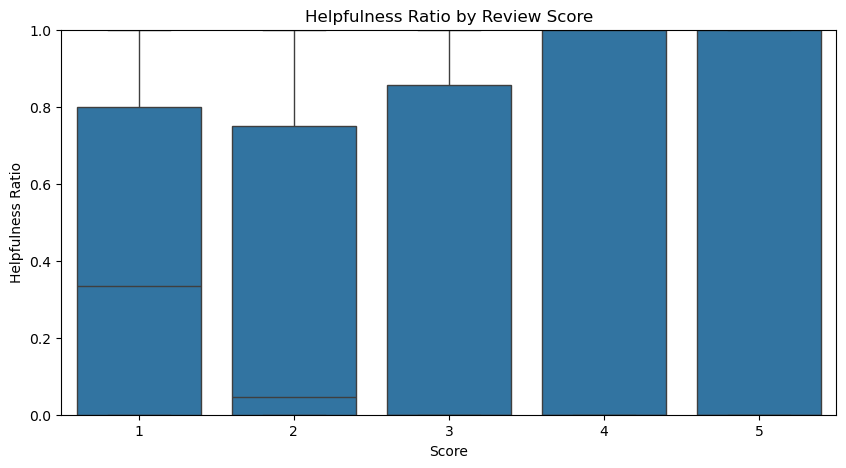

✅ Actionable Insights: This boxplot shows how helpfulness varies by score. If high-scoring reviews have higher helpfulness, it suggests positive reviews are more trusted.


In [28]:
# 2. Helpfulness Ratio Analysis (Avoid division by zero)
df["HelpfulnessRatio"] = df["HelpfulnessNumerator"] / df["HelpfulnessDenominator"]
df["HelpfulnessRatio"] = df["HelpfulnessRatio"].fillna(0)  # Replace NaN values

# Helpfulness Ratio vs. Score
plt.figure(figsize=(10, 5))
sns.boxplot(x="Score", y="HelpfulnessRatio", data=df)
plt.title("Helpfulness Ratio by Review Score")
plt.xlabel("Score")
plt.ylabel("Helpfulness Ratio")
plt.ylim(0, 1)
plt.show()
print("✅ Actionable Insights: This boxplot shows how helpfulness varies by score. If high-scoring reviews have higher helpfulness, it suggests positive reviews are more trusted.")

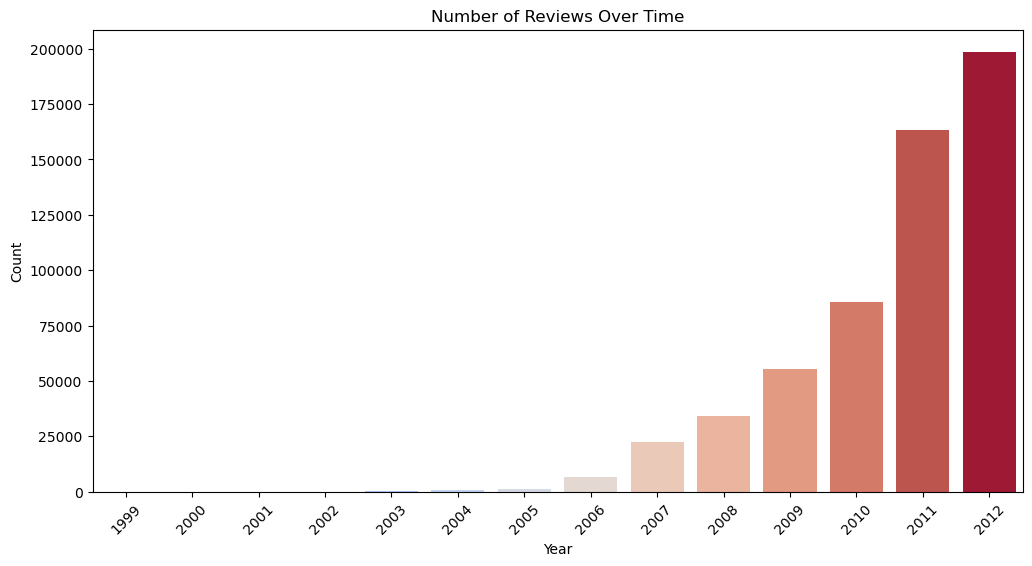

✅ Actionable Insights: This visualization tracks the number of reviews per year. Peaks may correspond to product launches or promotions.


In [30]:
# 3. Number of Reviews Over Time
plt.figure(figsize=(12, 6))
sns.countplot(x=df["Year"], hue=df["Year"], palette="coolwarm", order=sorted(df["Year"].unique()), legend=False)
plt.title("Number of Reviews Over Time")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()
print("✅ Actionable Insights: This visualization tracks the number of reviews per year. Peaks may correspond to product launches or promotions.")

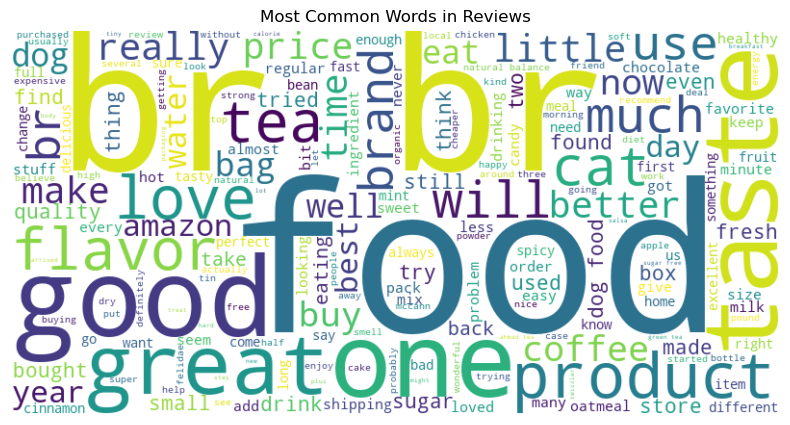

✅ Actionable Insights: The word cloud visualizes the most frequent words in reviews, helping identify key themes such as 'great' or 'bad'.


In [32]:
# 4. Word Cloud of Most Common Words in Reviews
text = " ".join(review.lower() for review in df["Text"].dropna() if len(review) > 3)
text = text[:100000]  # Limit text size

if len(text) > 0:
    wordcloud = WordCloud(width=800, height=400, background_color="white", max_words=200, colormap='viridis').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Most Common Words in Reviews")
    plt.show()
    print("✅ Actionable Insights: The word cloud visualizes the most frequent words in reviews, helping identify key themes such as 'great' or 'bad'.")
else:
    print("No words available for word cloud.")


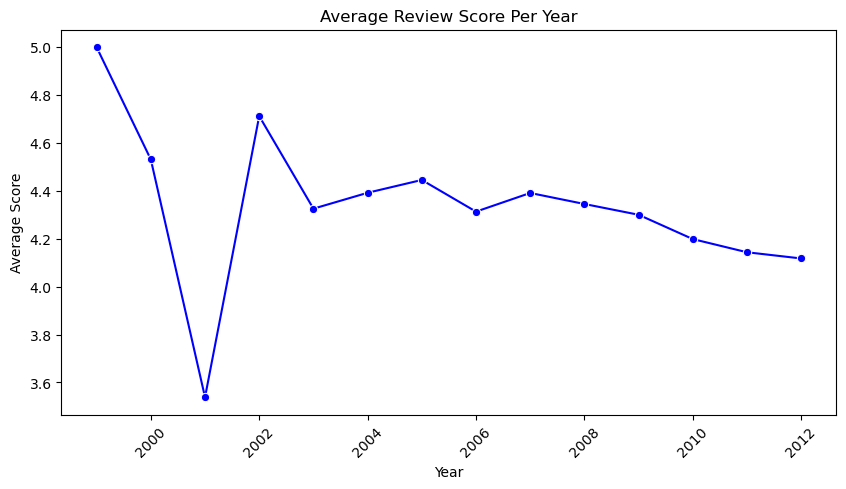

✅ Actionable Insights: This line chart shows the trend of average scores over time, indicating whether customer satisfaction is improving or declining.


In [34]:
# 5. Average Review Score Per Year
plt.figure(figsize=(10, 5))
avg_score_per_year = df.groupby("Year")["Score"].mean()
sns.lineplot(x=avg_score_per_year.index, y=avg_score_per_year.values, marker='o', color='b')
plt.title("Average Review Score Per Year")
plt.xlabel("Year")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.show()
print("✅ Actionable Insights: This line chart shows the trend of average scores over time, indicating whether customer satisfaction is improving or declining.")

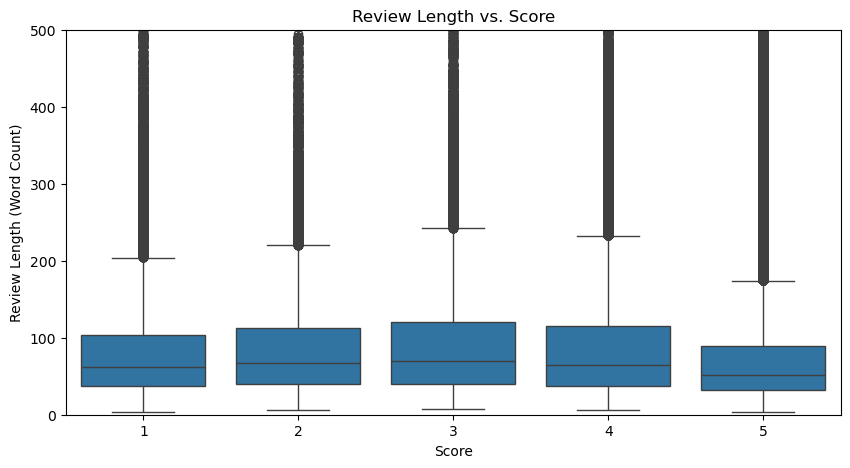

✅ Actionable Insights: This boxplot examines how review length correlates with score. Longer reviews tend to give more passionate ratings (1 or 5).


In [36]:
# 6. Review Length Analysis
df["ReviewLength"] = df["Text"].dropna().apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 5))
sns.boxplot(x="Score", y="ReviewLength", data=df)
plt.title("Review Length vs. Score")
plt.xlabel("Score")
plt.ylabel("Review Length (Word Count)")
plt.ylim(0, 500)
plt.show()
print("✅ Actionable Insights: This boxplot examines how review length correlates with score. Longer reviews tend to give more passionate ratings (1 or 5).")

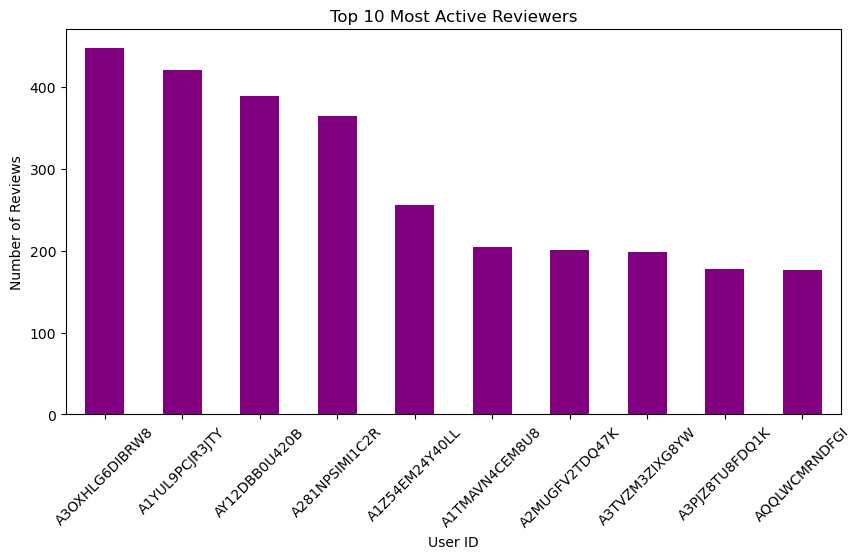

✅ Actionable Insights: This bar chart highlights users who have written the most reviews
helping identify key contributors or potential spam reviewers.


In [40]:
# 7. Most Active Reviewers
top_reviewers = df["UserId"].value_counts().head(10)
plt.figure(figsize=(10, 5))
top_reviewers.plot(kind='bar', color='purple')
plt.title("Top 10 Most Active Reviewers")
plt.xlabel("User ID")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.show()
print("✅ Actionable Insights: This bar chart highlights users who have written the most reviews")
print("Helping identify key contributors or potential spam reviewers.")